# Outcome regression for avg-glucose level

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('./stroke_data_dummies.csv')

In [3]:
df_r = df_raw[df_raw.Gender_Other == 0]

In [4]:
def glucose_check(x):
    if x >= 140:
        return 1
    else:
        return 0
    
df_r['diabetes'] = df_r.avg_glucose_level.apply(glucose_check)

In [5]:
df = df_r.drop(columns = ['Unnamed: 0','id','Obesity','Gender_Other','avg_glucose_level'])

In [6]:
df.head()

,age,hypertension,heart_disease,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban,diabetes
0,67.0,0,1,36.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1
1,80.0,0,1,32.5,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,49.0,0,0,34.4,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1
3,79.0,1,0,24.0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1
4,81.0,0,0,29.0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1


In [7]:
X = df.drop(columns = ['stroke', 'diabetes'])
X

,age,hypertension,heart_disease,bmi,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,36.6,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,80.0,0,1,32.5,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,49.0,0,0,34.4,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,79.0,1,0,24.0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,0,29.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,13.0,0,0,18.6,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4905,81.0,0,0,40.0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4906,35.0,0,0,30.6,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4907,51.0,0,0,25.6,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [8]:
df_0 = df[df['diabetes'] == 0]
df_0 = df_0.drop(columns = ['diabetes'])
df_0

,age,hypertension,heart_disease,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
1,80.0,0,1,32.5,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
5,74.0,1,1,27.4,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
6,69.0,0,0,22.8,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
7,78.0,0,0,24.2,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1
8,81.0,1,0,29.7,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,18.0,0,0,46.9,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4904,13.0,0,0,18.6,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4905,81.0,0,0,40.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4906,35.0,0,0,30.6,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0


In [9]:
df_1 = df[df['diabetes'] == 1]
df_1 = df_1.drop(columns = ['diabetes'])
df_1

,age,hypertension,heart_disease,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,36.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
2,49.0,0,0,34.4,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,79.0,1,0,24.0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,0,29.0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
11,79.0,0,1,28.2,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,39.0,0,0,27.7,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
4866,70.0,0,0,24.3,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
4878,34.0,0,0,23.0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
4888,51.0,0,0,21.8,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1


In [10]:
y_0 = df_0['stroke']
x_0 = df_0.drop(columns = ['stroke'])

In [11]:
y_1 = df_1['stroke']
x_1 = df_1.drop(columns = ['stroke'])

# Model for controlled group

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [13]:
rfc = RandomForestClassifier(random_state=60)
score_pre_0 = cross_val_score(rfc,x_0,y_0,cv=5).mean()
score_pre_0

0.9665382106041495

nan 1


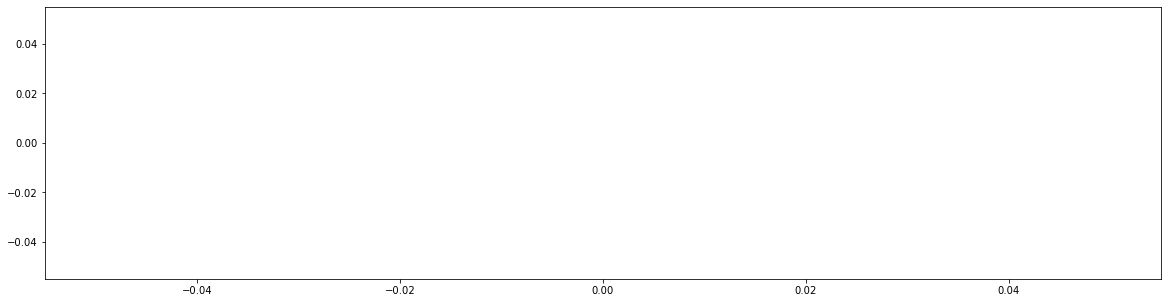

In [14]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

nan 1


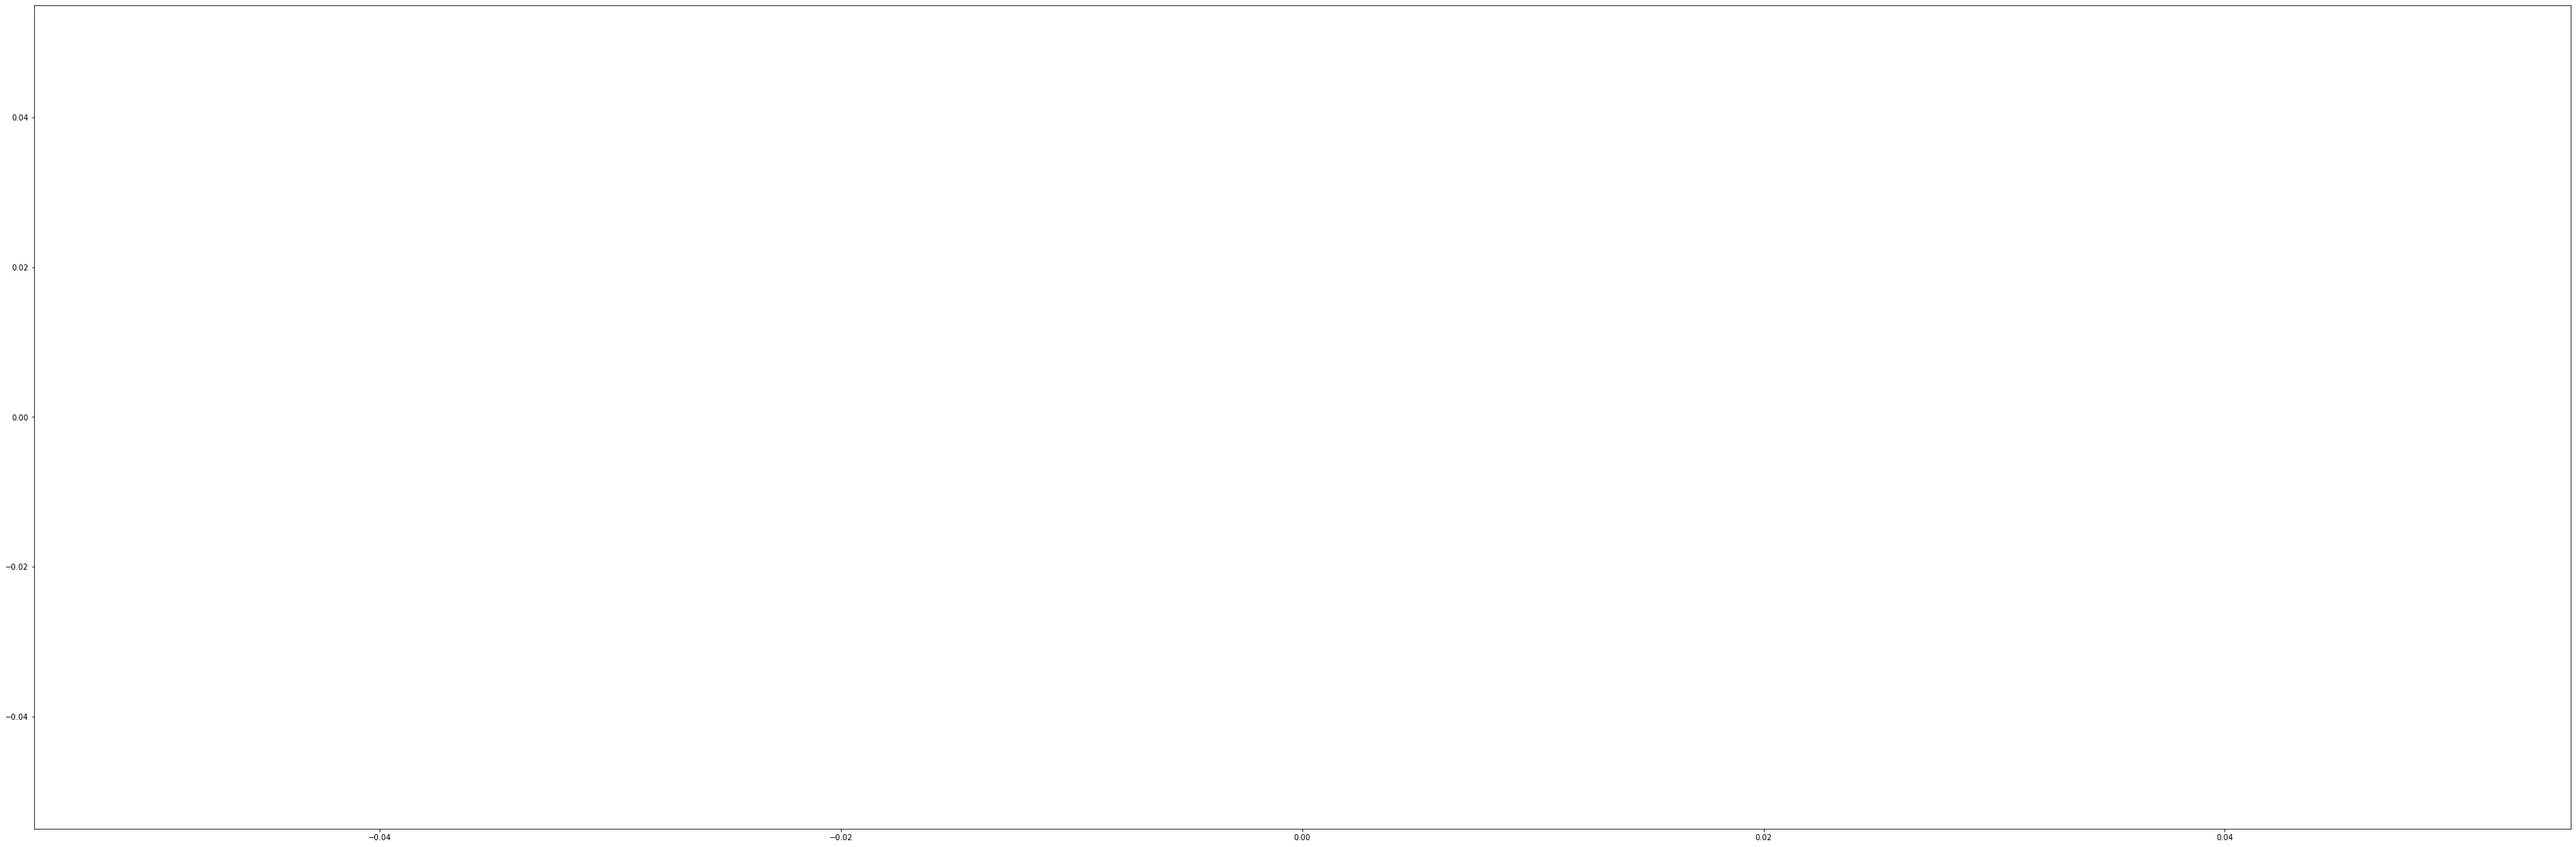

In [15]:
scorel = []
for i in range(1,71):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(1,71)][scorel.index(max(scorel))]))
plt.figure(figsize=[60,20])
plt.plot(range(1,71),scorel)
plt.show()

In [16]:
param_grid = {'max_depth':np.arange(1, 30, 1)}
rfc = RandomForestClassifier(n_estimators=40
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=60),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
GS.best_params_

{'max_depth': 1}

In [18]:
GS.best_score_

0.9689458193785974

In [19]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=40
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=60),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [20]:
GS.best_params_

{'max_features': 4}

In [21]:
GS.best_score_

0.9665382106041495

In [22]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=40
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=60),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [23]:
GS.best_params_

{'min_samples_leaf': 4}

In [24]:
GS.best_score_

0.9689458193785974

In [25]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=40
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=60),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [26]:
GS.best_params_

{'min_samples_split': 11}

In [27]:
GS.best_score_

0.9689458193785974

In [28]:
rfc_0 = RandomForestClassifier(n_estimators=40,max_depth = 1,random_state=60)
score_0 = cross_val_score(rfc_0,x_0,y_0,cv=5).mean()
score_0

0.9689458193785974

In [29]:
score_0 - score_pre_0

0.0024076087744479002

# Model for treatment group

In [30]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre_1 = cross_val_score(rfc,x_1,y_1,cv=5).mean()
score_pre_1

0.8833024282560705

nan 1


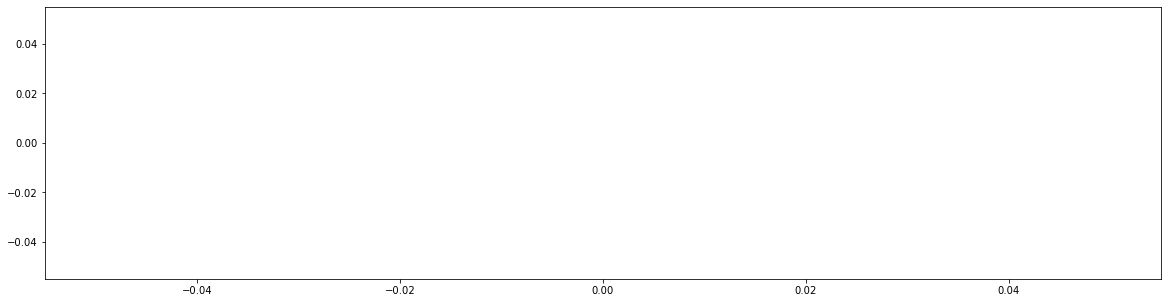

In [31]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

nan 141


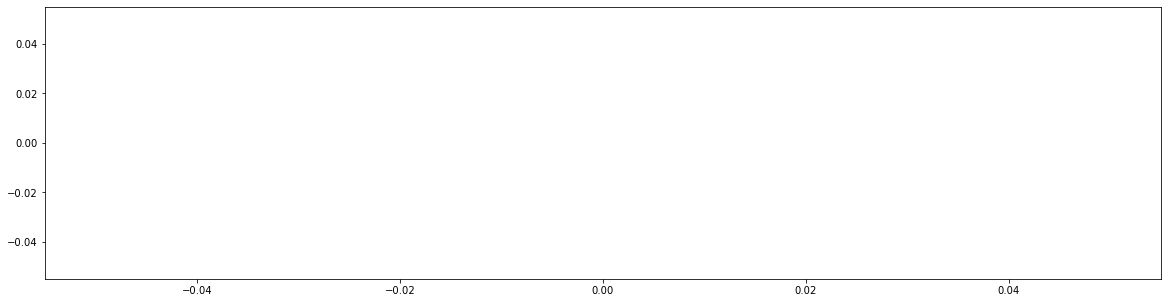

In [32]:
scorel = []
for i in range(141,201):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(141,201)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(141,201),scorel)
plt.show()

In [33]:
param_grid = {'max_depth':np.arange(1, 30, 1)}
rfc = RandomForestClassifier(n_estimators=151
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=151,
                                              random_state=80),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [34]:
GS.best_params_

{'max_depth': 7}

In [35]:
GS.best_score_

0.8952317880794702

In [36]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=151
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=151,
                                              random_state=80),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [37]:
GS.best_params_

{'max_features': 8}

In [38]:
GS.best_score_

0.8833112582781457

In [39]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=151
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=151,
                                              random_state=80),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [40]:
GS.best_params_

{'min_samples_leaf': 4}

In [41]:
GS.best_score_

0.8938984547461368

In [42]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=151
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=151,
                                              random_state=80),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [43]:
GS.best_params_

{'min_samples_split': 12}

In [44]:
GS.best_score_

0.8938984547461368

In [45]:
rfc_1 = RandomForestClassifier(n_estimators=151,max_depth = 7, random_state=80)
score_1 = cross_val_score(rfc_1,x_1,y_1,cv=5).mean()
score_1

0.8952317880794702

In [46]:
score_1 - score_pre_1

0.01192935982339971

# Outcome modeling

In [47]:
from scipy import stats
import scipy.stats

In [48]:
rfc0 = rfc_0.fit(x_0, y_0)

In [49]:
predict_0 = rfc0.predict(X)
mean_0 = predict_0.mean()
mean_0

0.0

In [50]:
rfc1 = rfc_1.fit(x_1, y_1)

In [51]:
predict_1 = rfc1.predict(X)
mean_1 = predict_1.mean()
mean_1

0.002037489812550937

In [52]:
ATE_outcome = mean_1 - mean_0
ATE_outcome

0.002037489812550937

In [53]:
t,pval = scipy.stats.ttest_ind(predict_0,predict_1,equal_var=False,alternative='less')
print(t,pval)

-3.165181645162925 0.0007796715253973722


# IPW for avg_glucose_level

In [54]:
from sklearn.linear_model import LogisticRegression as lr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [55]:
# Enabled to remove warnings for demo purposes.
import warnings
warnings.filterwarnings('ignore')

In [56]:
import math
import numpy as np
import pandas as pd
# import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

from scipy import stats

In [57]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [58]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [59]:
# delete row with NA value
df_na = df.dropna()

In [60]:
df_na.reset_index(inplace=True)

In [61]:
pd.isnull(df_na).any()

index                False
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [62]:
df_na

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [63]:
df_na['ever_married'] = df_na.ever_married.map({'Yes':1, 'No':0})
# For gender, 1 means Male, 0 means Female
df_na['gender'] = df_na.gender.map({'Male':1, 'Female':0})
# For Residence_type, 1 means Urban, 0 means Rural
df_na['Residence_type'] = df_na.Residence_type.map({'Urban':1, 'Rural':0})

In [64]:
pd.isnull(df_na).any()
# there is one sample with 'Other' gender'

index                False
id                   False
gender                True
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [65]:
# delete the row with 'gender' value of 'Other'
df_na = df_na.dropna()
df_na.reset_index(drop=True,inplace=True)
pd.isnull(df_na).any()

index                False
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [66]:
df_na

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1.0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,2,31112,1.0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,3,60182,0.0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,4,1665,0.0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,5,56669,1.0,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,5104,14180,0.0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
4904,5106,44873,0.0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
4905,5107,19723,0.0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
4906,5108,37544,1.0,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [67]:
def Glucose_check(x):
    if x >= 140:
        return 1
    else:
        return 0
# 1 means it is higher than the bound. 0 means lower.
df_na['treatment_glucose_level'] = df_na.avg_glucose_level.apply(Glucose_check)

In [68]:
df_data = df_na.drop(columns=['index','id','avg_glucose_level'])
df_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,treatment_glucose_level
0,1.0,67.0,0,1,1,Private,1,36.6,formerly smoked,1,1
1,1.0,80.0,0,1,1,Private,0,32.5,never smoked,1,0
2,0.0,49.0,0,0,1,Private,1,34.4,smokes,1,1
3,0.0,79.0,1,0,1,Self-employed,0,24.0,never smoked,1,1
4,1.0,81.0,0,0,1,Private,1,29.0,formerly smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,13.0,0,0,0,children,0,18.6,Unknown,0,0
4904,0.0,81.0,0,0,1,Self-employed,1,40.0,never smoked,0,0
4905,0.0,35.0,0,0,1,Self-employed,0,30.6,never smoked,0,0
4906,1.0,51.0,0,0,1,Private,0,25.6,formerly smoked,0,1


In [69]:
df_encoded = pd.get_dummies(df_data, columns = ['work_type','smoking_status'], \
                           prefix = {'work_type':'work_type', 'smoking_status' : 'smoking_status'}, drop_first=False)
df_encoded

,gender,age,hypertension,heart_disease,ever_married,Residence_type,bmi,stroke,treatment_glucose_level,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1,1,36.6,1,1,0,0,1,0,0,0,1,0,0
1,1.0,80.0,0,1,1,0,32.5,1,0,0,0,1,0,0,0,0,1,0
2,0.0,49.0,0,0,1,1,34.4,1,1,0,0,1,0,0,0,0,0,1
3,0.0,79.0,1,0,1,0,24.0,1,1,0,0,0,1,0,0,0,1,0
4,1.0,81.0,0,0,1,1,29.0,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0.0,13.0,0,0,0,0,18.6,0,0,0,0,0,0,1,1,0,0,0
4904,0.0,81.0,0,0,1,1,40.0,0,0,0,0,0,1,0,0,0,1,0
4905,0.0,35.0,0,0,1,0,30.6,0,0,0,0,0,1,0,0,0,1,0
4906,1.0,51.0,0,0,1,0,25.6,0,1,0,0,1,0,0,0,1,0,0


In [70]:
df_treatment = df_encoded[df_encoded['treatment_glucose_level']==1]
df_control = df_encoded[df_encoded['treatment_glucose_level']==0]
treat_mean = df_treatment.mean()
treat_std = df_treatment.std()
control_mean = df_control.mean()
control_std = df_control.std()

In [71]:
X_list = ['gender','age','hypertension','heart_disease','ever_married','Residence_type','bmi','work_type_Govt_job',
          'work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','smoking_status_Unknown',
          'smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
X_descrip = ['0 to Female and 1 to Male','age of the sample','observation of hypertension','observation of heart_disease',
             'Marriage states','0 to Rural and 1 to Urban','bmi','Whether is government job',
             'Whether is never worked','Whether job is private','Whether job is self-employed','Whether job is children',
             'Whether smoking status is unknown','Whether is formerly smoked','Whether is never smoked','Whether is smokes']

In [72]:
summary_list = []

for i in range(0, len(X_list)):
    summary_list.append([X_list[i],X_descrip[i],control_mean[X_list[i]],control_std[X_list[i]],treat_mean[X_list[i]],treat_std[X_list[i]],
                    stats.ttest_ind(df_control[X_list[i]], df_treatment[X_list[i]], equal_var=False)[0]])

summary_df = pd.DataFrame(summary_list,columns=
                          ['Label', 'Variable Description','Controls Mean','Controls STD','Treated Mean','Treated STD','t-Statistics'])
summary_df

,Label,Variable Description,Controls Mean,Controls STD,Treated Mean,Treated STD,t-Statistics
0,gender,0 to Female and 1 to Male,0.398411,0.489630,0.472149,0.499555,-3.740135
1,age,age of the sample,40.536081,22.300920,55.720477,19.421345,-19.284613
2,hypertension,observation of hypertension,0.069090,0.253638,0.217507,0.412824,-9.550201
3,heart_disease,observation of heart_disease,0.035388,0.184780,0.127321,0.333553,-7.365844
4,ever_married,Marriage states,0.620366,0.485354,0.831565,0.374501,-13.556302
5,Residence_type,0 to Rural and 1 to Urban,0.506259,0.500021,0.513263,0.500156,-0.353752
6,bmi,bmi,28.298387,7.679817,32.179045,7.997494,-12.331939
7,work_type_Govt_job,Whether is government job,0.125662,0.331508,0.143236,0.350546,-1.276873
8,work_type_Never_worked,Whether is never worked,0.004815,0.069229,0.002653,0.051468,1.000831
9,work_type_Private,Whether job is private,0.570053,0.495128,0.586207,0.492839,-0.827426


In [73]:
df = df_encoded

In [74]:
Y = df.stroke

df_data = df.loc[:,df.columns !='stroke']
T = df_data.treatment_glucose_level
X = df_data.loc[:,df_data.columns !='treatment_glucose_level']
T

0       1
1       0
2       1
3       1
4       1
       ..
4903    0
4904    0
4905    0
4906    1
4907    0
Name: treatment_glucose_level, Length: 4908, dtype: int64

In [75]:
X_g = ['age','hypertension','heart_disease','bmi']

In [76]:
T.mean()

0.15362673186634065

In [77]:
model_initial = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:4}))])
model_initial.fit(X.loc[:,X_g], T)

predictions = model_initial.predict_proba(X.loc[:,X_g])
predictions_binary = model_initial.predict(X.loc[:,X_g])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.7618

Confusion matrix:
[[3325  829]
 [ 340  414]]

F1 score is: 0.4146


In [78]:
likelihood_ratio_table = []
X_l = X_g.copy()

while not likelihood_ratio_table or max([x for x in likelihood_ratio_table[-1].values() if x != '-']) >= 1:
    if likelihood_ratio_table:
        max_likelihood_ratio = max([x for x in likelihood_ratio_table[-1].values() if x != '-'])
        next_label = [key for key in likelihood_ratio_table[-1] if likelihood_ratio_table[-1][key] == max_likelihood_ratio][0]
        X_l.append(next_label)
    model = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:4}))])
    model.fit(X.loc[:,X_l], T)
    step = {}
    for x in X.columns:
        if x in X_l:
            step[x] = '-'
        else:
            X_new = X_l.copy()
            X_new.append(x)
            model_new = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:4}))])
            model_new.fit(X.loc[:,X_new], T)
            
            step[x] = -2*((-metrics.log_loss(T, model.predict_proba(X.loc[:,X_l]))*len(T))
                      -(-metrics.log_loss(T, model_new.predict_proba(X.loc[:,X_new]))*len(T)))
    likelihood_ratio_table.append(step)

In [79]:
X_l

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'gender',
 'work_type_children',
 'smoking_status_Unknown',
 'ever_married',
 'work_type_Never_worked']

In [80]:
linear_terms_list = []
for x in X.columns:
    row = [step[x] for step in likelihood_ratio_table]
    row.insert(0, x)
    linear_terms_list.append(row)
    
columns = ['Label']
for i in range(0,len(likelihood_ratio_table)):
    step = 'Step ' + str(i+1)
    columns.append(step)
    
linear_terms_df = pd.DataFrame(linear_terms_list,columns = columns)
linear_terms_df

,Label,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6
0,gender,19.073622,-,-,-,-,-
1,age,-,-,-,-,-,-
2,hypertension,-,-,-,-,-,-
3,heart_disease,-,-,-,-,-,-
4,ever_married,0.634818,0.540819,2.501759,2.296151,-,-
5,Residence_type,0.070596,0.074609,0.069361,0.084035,0.079983,0.059932
6,bmi,-,-,-,-,-,-
7,work_type_Govt_job,0.115045,0.090918,-0.016364,-0.007365,-0.000397,0.000324
8,work_type_Never_worked,0.657222,0.589452,0.987675,1.015231,1.323178,-
9,work_type_Private,-0.047031,0.077384,0.238391,0.305258,0.271985,0.408997


In [81]:
model_linear = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:4}))])
model_linear.fit(X.loc[:,X_l], T)

predictions_binary = model_linear.predict(X.loc[:,X_l])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.7612

Confusion matrix:
[[3291  863]
 [ 309  445]]

F1 score is: 0.4316


In [82]:
X_copy = X.loc[:,X_l]

for i in range(0, len(X_l)):
    j = i
    while j < len(X_l):
        X_copy[X_l[i]+'*'+X_l[j]] = X_copy[X_l[i]] * X_copy[X_l[j]]
        j += 1

X_copy

,age,hypertension,heart_disease,bmi,gender,work_type_children,smoking_status_Unknown,ever_married,work_type_Never_worked,age*age,...,work_type_children*work_type_children,work_type_children*smoking_status_Unknown,work_type_children*ever_married,work_type_children*work_type_Never_worked,smoking_status_Unknown*smoking_status_Unknown,smoking_status_Unknown*ever_married,smoking_status_Unknown*work_type_Never_worked,ever_married*ever_married,ever_married*work_type_Never_worked,work_type_Never_worked*work_type_Never_worked
0,67.0,0,1,36.6,1.0,0,0,1,0,4489.0,...,0,0,0,0,0,0,0,1,0,0
1,80.0,0,1,32.5,1.0,0,0,1,0,6400.0,...,0,0,0,0,0,0,0,1,0,0
2,49.0,0,0,34.4,0.0,0,0,1,0,2401.0,...,0,0,0,0,0,0,0,1,0,0
3,79.0,1,0,24.0,0.0,0,0,1,0,6241.0,...,0,0,0,0,0,0,0,1,0,0
4,81.0,0,0,29.0,1.0,0,0,1,0,6561.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,13.0,0,0,18.6,0.0,1,1,0,0,169.0,...,1,1,0,0,1,0,0,0,0,0
4904,81.0,0,0,40.0,0.0,0,0,1,0,6561.0,...,0,0,0,0,0,0,0,1,0,0
4905,35.0,0,0,30.6,0.0,0,0,1,0,1225.0,...,0,0,0,0,0,0,0,1,0,0
4906,51.0,0,0,25.6,1.0,0,0,1,0,2601.0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
likelihood_ratio_table = []
X_2 = X_l.copy()

while not likelihood_ratio_table or max([x for x in likelihood_ratio_table[-1].values() if x != '-']) >= 2.71:
    if likelihood_ratio_table:
        max_likelihood_ratio = max([x for x in likelihood_ratio_table[-1].values() if x != '-'])
        next_label = [key for key in likelihood_ratio_table[-1] if likelihood_ratio_table[-1][key] == max_likelihood_ratio][0]
        X_2.append(next_label)
    model = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:4}))])
    model.fit(X_copy.loc[:,X_2], T)
    step = {}
    for x in X_copy.columns:
        if x in X_2:
            step[x] = '-'
        else:
            X_new = X_2.copy()
            X_new.append(x)
            model_new = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:4}))])
            model_new.fit(X_copy.loc[:,X_new], T)
            
            step[x] = -2*((-metrics.log_loss(T, model.predict_proba(X_copy.loc[:,X_2]))*len(T))
                      -(-metrics.log_loss(T, model_new.predict_proba(X_copy.loc[:,X_new]))*len(T)))
    likelihood_ratio_table.append(step)

In [84]:
final_terms_list = []
for x in X_copy.columns:
    row = [step[x] for step in likelihood_ratio_table]
    row.insert(0, x)
    final_terms_list.append(row)
    
final_columns = ['Label']
for i in range(0,len(likelihood_ratio_table)):
    step = 'Step ' + str(i+1)
    final_columns.append(step)
    
final_terms_df = pd.DataFrame(final_terms_list,columns = final_columns)
final_terms_df

,Label,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9
0,age,-,-,-,-,-,-,-,-,-
1,hypertension,-,-,-,-,-,-,-,-,-
2,heart_disease,-,-,-,-,-,-,-,-,-
3,bmi,-,-,-,-,-,-,-,-,-
4,gender,-,-,-,-,-,-,-,-,-
5,work_type_children,-,-,-,-,-,-,-,-,-
6,smoking_status_Unknown,-,-,-,-,-,-,-,-,-
7,ever_married,-,-,-,-,-,-,-,-,-
8,work_type_Never_worked,-,-,-,-,-,-,-,-,-
9,age*age,-0.456462,0.243005,0.253178,0.677132,0.770905,0.304231,0.285913,0.208414,-0.075912


In [85]:
X_2

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'gender',
 'work_type_children',
 'smoking_status_Unknown',
 'ever_married',
 'work_type_Never_worked',
 'age*bmi',
 'heart_disease*gender',
 'work_type_children*smoking_status_Unknown',
 'hypertension*bmi',
 'age*smoking_status_Unknown',
 'hypertension*smoking_status_Unknown',
 'age*work_type_Never_worked',
 'age*ever_married']

In [86]:
model_final = Pipeline([('scaler', StandardScaler()),('logistic_classifier', lr(class_weight={0:1,1:4}))])
model_final.fit(X_copy.loc[:,X_2], T)
predictions = model_initial.predict_proba(X.loc[:,X_g])
predictions_binary = model_final.predict(X_copy.loc[:,X_2])
print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
print('F1 score is: {:.4f}'.format(metrics.f1_score(T, predictions_binary)))

Accuracy: 0.7710

Confusion matrix:
[[3347  807]
 [ 317  437]]

F1 score is: 0.4374


In [87]:
treat_index = []
control_index = []
for i in range(0,len(T)):
    if T[i] == 1:
        treat_index.append(i)
    elif T[i] == 0:
        control_index.append(i)

In [97]:
predictions = model_final.predict_proba(X_copy.loc[:,X_2])

A = sum([T[i]*Y[i]/predictions[i][1] for i in treat_index]) / sum([T[i]/predictions[i][1] for i in treat_index])
A

0.07073972750569343

In [98]:
B = sum([(1-T[i])*Y[i]/(1-predictions[i][1]) for i in control_index]) / sum([(1-T[i])/(1-predictions[i][1]) for i in control_index])
B

0.04456253470832627

In [100]:
ate_ipw = A - B
ate_ipw

0.026177192797367167

# Doubly-robust estimator

In [107]:
ate_dr = ATE_outcome + ate_ipw - sum([T[i]*mean_1/predictions[i][1] for i in treat_index])/ sum([T[i]/predictions[i][1] for i in treat_index]) + sum([(1-T[i])*mean_0/(1-predictions[i][1]) for i in control_index]) / sum([(1-T[i])/(1-predictions[i][1]) for i in control_index])

In [108]:
ate_dr

0.026177192797367164